# Ablation Study Analysis

This notebook analyzes the results of the ablation study on different exploration/exploitation strategies for data augmentation.

🔬 Ablation Study Analysis
✅ Loaded exploration_only results
✅ Loaded exploitation_only results
✅ Loaded balanced_sigmoid results

📊 Loaded data for 3 scenarios with 30 total iterations

📈 Summary Statistics:
            scenario  initial_accuracy  final_accuracy  price_of_fairness  \
0   exploration_only             0.635           0.665             -0.030   
1  exploitation_only             0.635           0.680             -0.045   
2   balanced_sigmoid             0.635           0.705             -0.070   

   total_iterations  
0                10  
1                10  
2                10  

💰 PRICE OF FAIRNESS ANALYSIS


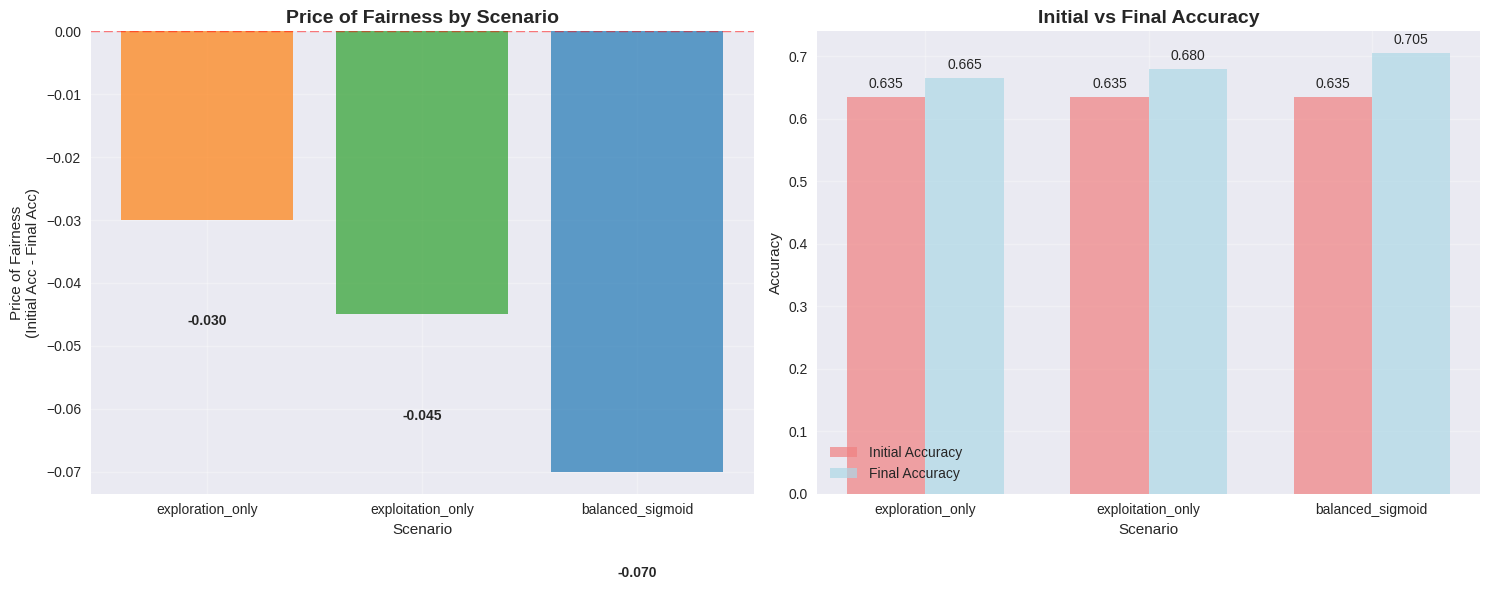


💡 Price of Fairness Interpretation:
  • exploration_only: NEGATIVE (-0.030) - Overall accuracy IMPROVED while improving fairness!
  • exploitation_only: NEGATIVE (-0.045) - Overall accuracy IMPROVED while improving fairness!
  • balanced_sigmoid: NEGATIVE (-0.070) - Overall accuracy IMPROVED while improving fairness!

📉 WORST GROUP ACCURACY PROGRESSION


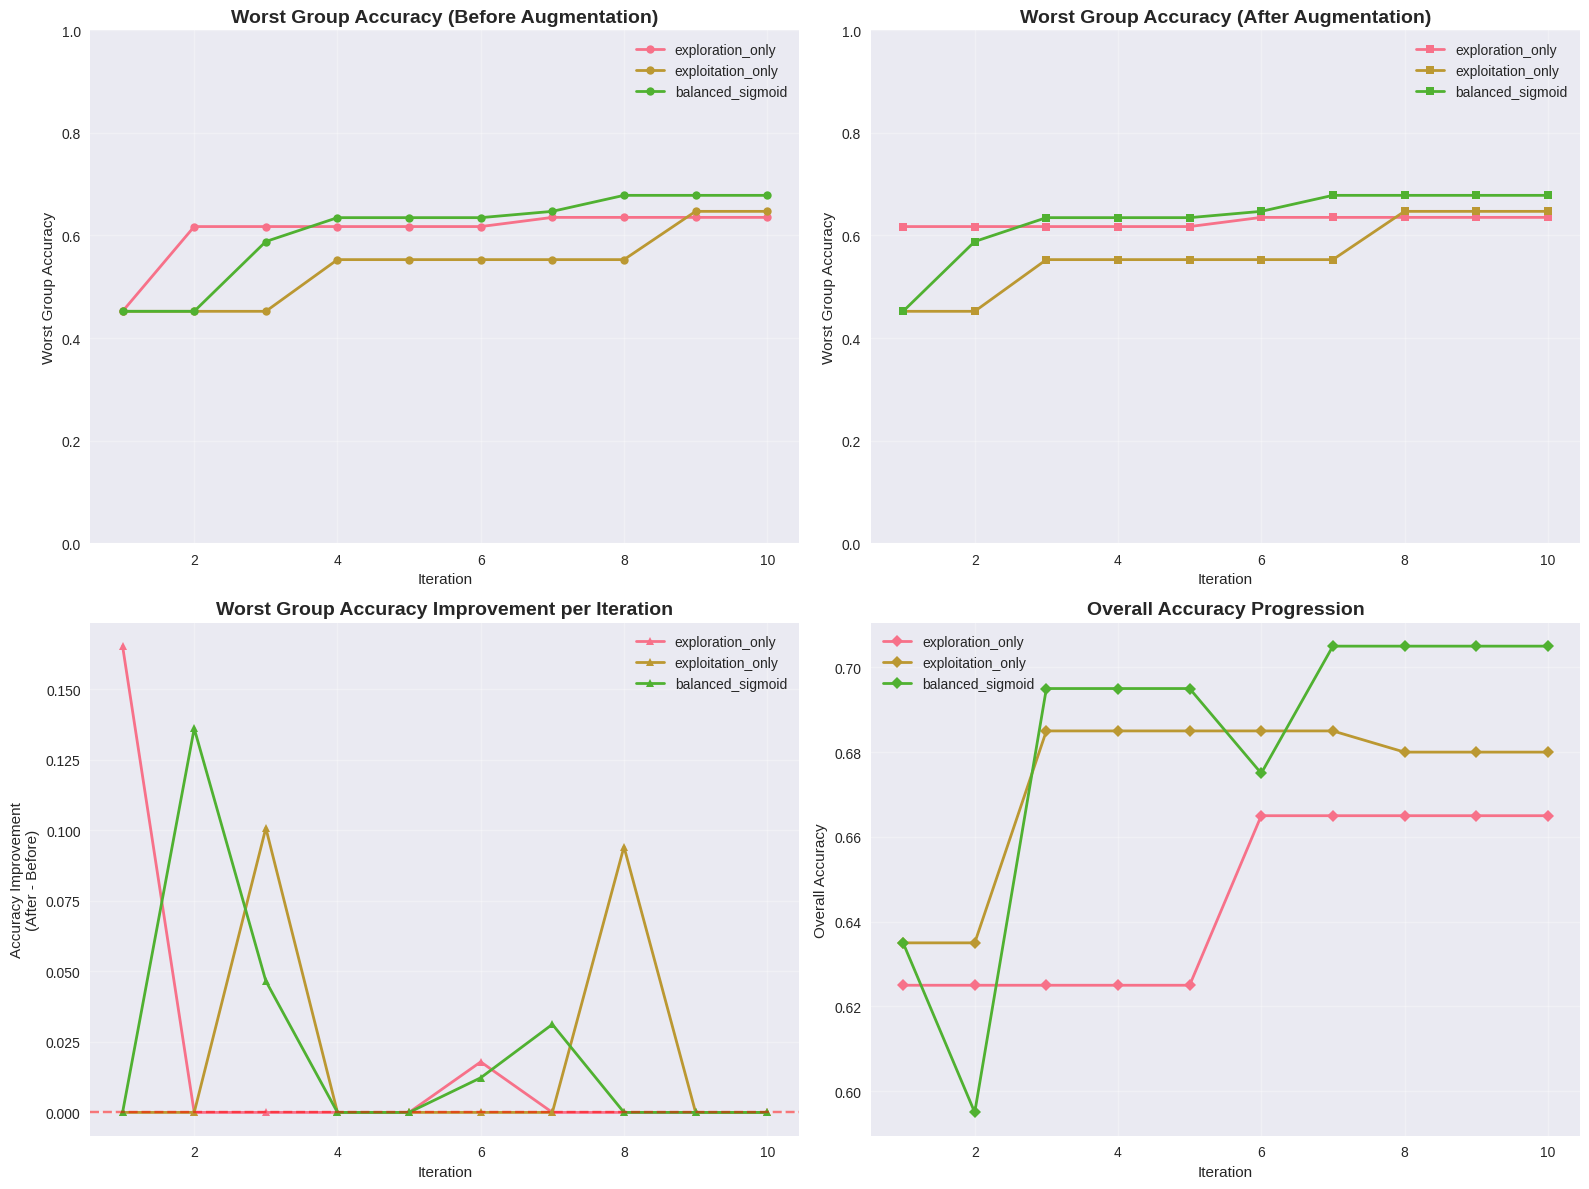


📊 STATISTICAL ANALYSIS
📈 Worst Group Accuracy Statistics:

EXPLORATION_ONLY:
  • Mean improvement per iteration: 0.0183
  • Std deviation: 0.0519
  • Positive improvements: 2/10 iterations
  • Best single improvement: 0.1652
  • Worst single change: 0.0000
  • Final worst group accuracy: 0.6353

EXPLOITATION_ONLY:
  • Mean improvement per iteration: 0.0195
  • Std deviation: 0.0411
  • Positive improvements: 2/10 iterations
  • Best single improvement: 0.1008
  • Worst single change: 0.0000
  • Final worst group accuracy: 0.6471

BALANCED_SIGMOID:
  • Mean improvement per iteration: 0.0226
  • Std deviation: 0.0431
  • Positive improvements: 4/10 iterations
  • Best single improvement: 0.1361
  • Worst single change: 0.0000
  • Final worst group accuracy: 0.6783

👥 GROUP DISTRIBUTION ANALYSIS


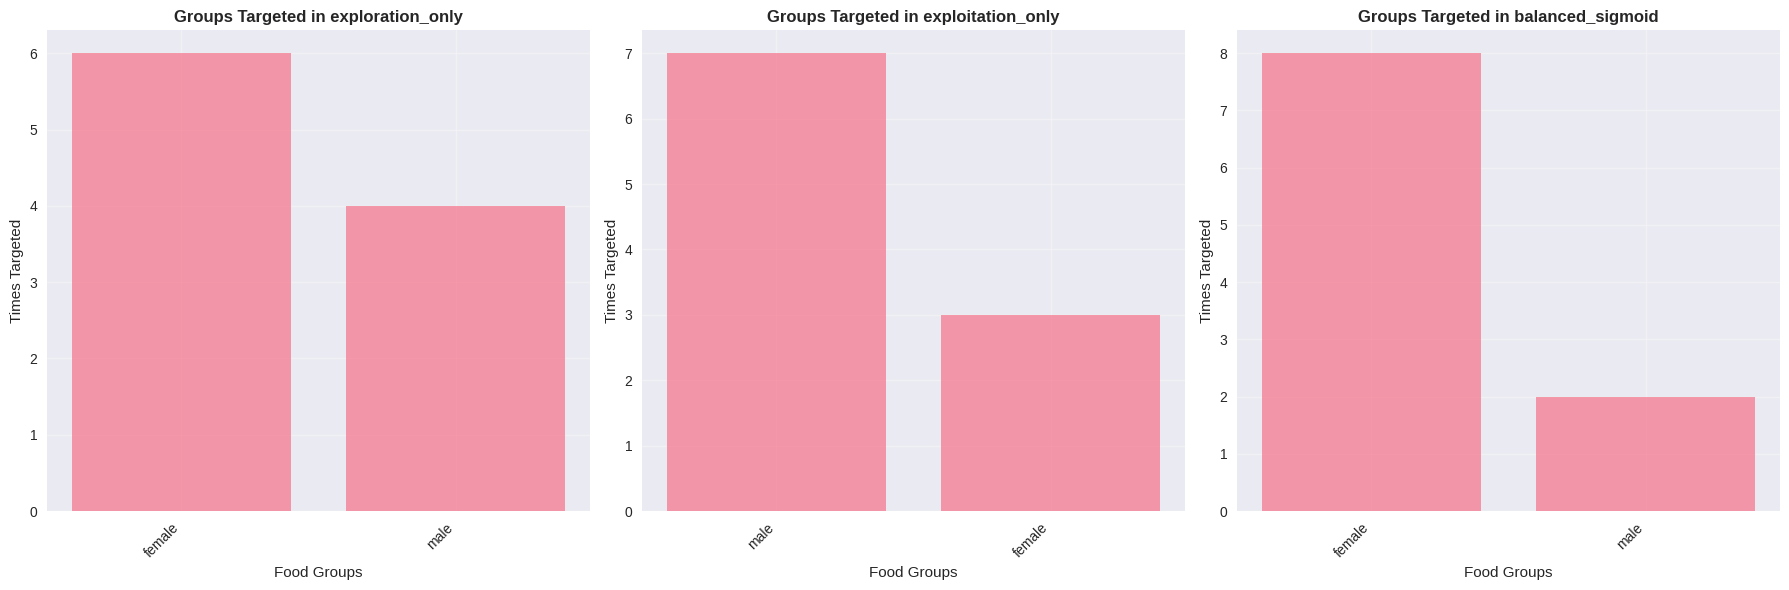

🎯 Group Targeting Summary:

EXPLORATION_ONLY:
  • female: targeted 6 times
  • male: targeted 4 times

EXPLOITATION_ONLY:
  • male: targeted 7 times
  • female: targeted 3 times

BALANCED_SIGMOID:
  • female: targeted 8 times
  • male: targeted 2 times

🎯 CONVERGENCE ANALYSIS
Target Accuracy Threshold: 0.95


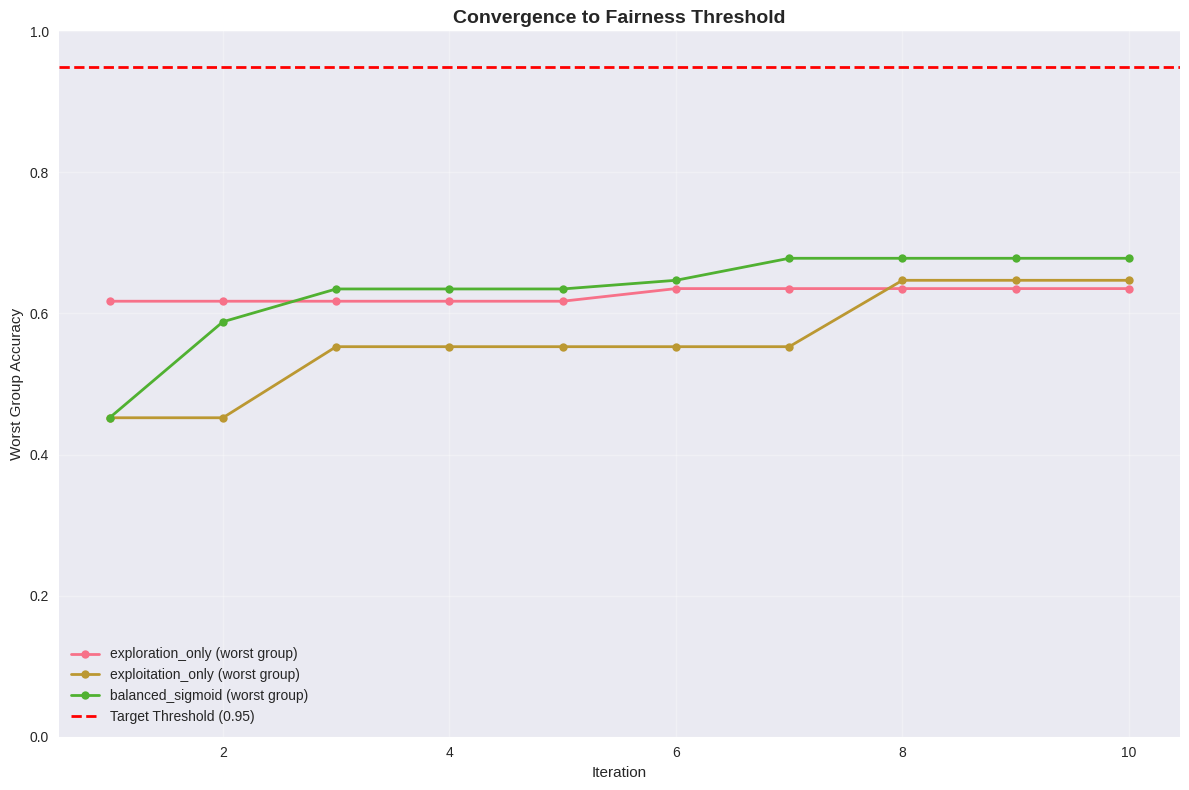

📊 Convergence Summary:

EXPLORATION_ONLY:
  • Final worst group accuracy: 0.6353
  • Reached threshold (0.95): ❌ NO
  • Gap to threshold: 0.3147

EXPLOITATION_ONLY:
  • Final worst group accuracy: 0.6471
  • Reached threshold (0.95): ❌ NO
  • Gap to threshold: 0.3029

BALANCED_SIGMOID:
  • Final worst group accuracy: 0.6783
  • Reached threshold (0.95): ❌ NO
  • Gap to threshold: 0.2717

⚡ EFFICIENCY ANALYSIS
⚡ Efficiency Metrics:
            scenario  total_improvement  total_images  efficiency  iterations
0   exploration_only           0.183120           100    0.001831          10
1  exploitation_only           0.194885           100    0.001949          10
2   balanced_sigmoid           0.226087           100    0.002261          10


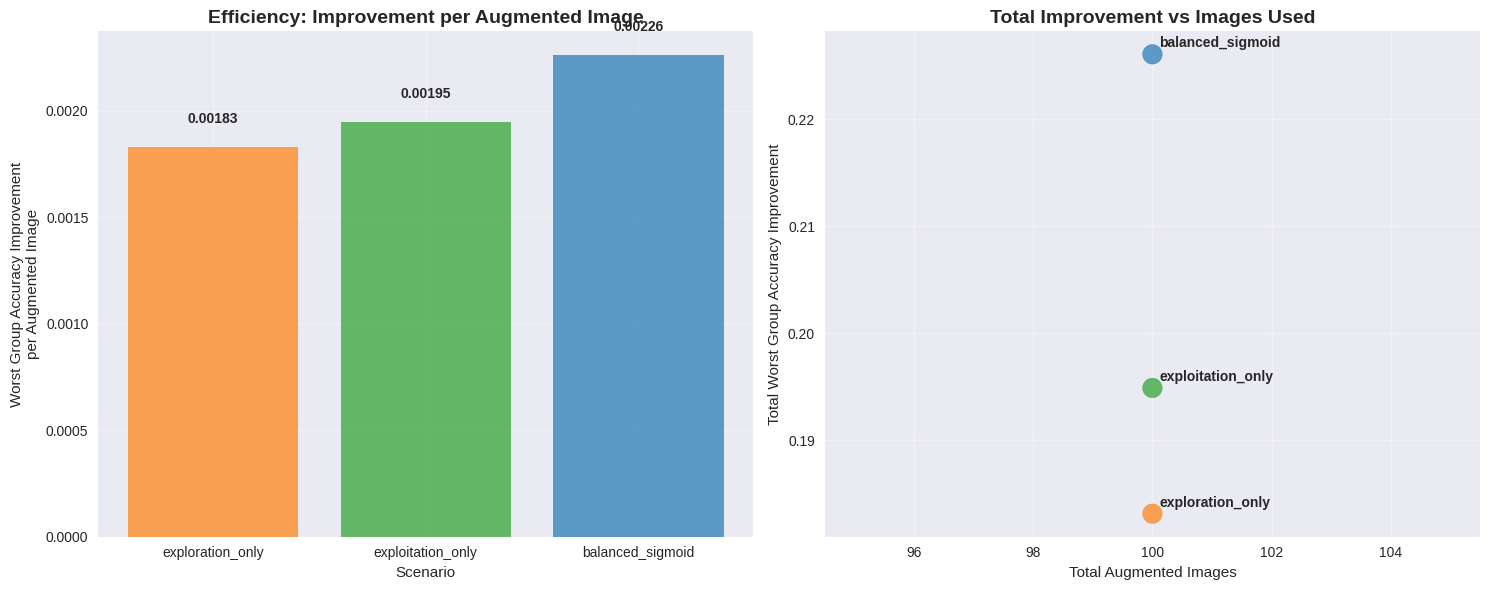


💡 RECOMMENDATIONS
🏆 BEST PERFORMING SCENARIOS:
  • Most Efficient: balanced_sigmoid
  • Best Price of Fairness: balanced_sigmoid

✅ ANALYSIS COMPLETE


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configuration
RESULTS_DIR = Path("../ablation_results/")
SCENARIOS = ["exploration_only", "exploitation_only", "balanced_sigmoid"]

print("🔬 Ablation Study Analysis")
print("=" * 50)

# Load all scenario results
def load_scenario_results():
    """Load results from all scenario JSON files"""
    results = {}
    
    for scenario in SCENARIOS:
        file_path = RESULTS_DIR / f"{scenario}_results.json"
        try:
            with open(file_path, 'r') as f:
                results[scenario] = json.load(f)
            print(f"✅ Loaded {scenario} results")
        except FileNotFoundError:
            print(f"❌ File not found: {file_path}")
        except json.JSONDecodeError:
            print(f"❌ Invalid JSON in: {file_path}")
    
    return results

# Load the data
scenario_results = load_scenario_results()

# Extract key metrics for analysis
def extract_metrics(results):
    """Extract key metrics from all scenarios for comparative analysis"""
    metrics_data = []
    
    for scenario_name, data in results.items():
        scenario_info = {
            'scenario': scenario_name,
            'initial_accuracy': data['initial_accuracy'],
            'final_accuracy': data['final_accuracy'],
            'price_of_fairness': data['price_of_fairness'],
            'total_iterations': len(data['iterations']),
            'parameters': data['parameters']
        }
        
        # Extract iteration-wise metrics
        iterations = []
        for iteration in data['iterations']:
            iter_data = {
                'scenario': scenario_name,
                'iteration': iteration['iteration'],
                'worst_group_acc_before': iteration['worst_group_before_aug']['accuracy'],
                'worst_group_acc_after': iteration['worst_group_after_aug']['accuracy'],
                'overall_accuracy': iteration['overall_accuracy'],
                'augmented_images': iteration['augmented_images_generated'],
                'worst_group_before_label': iteration['worst_group_before_aug']['attributes']['label'],
                'worst_group_after_label': iteration['worst_group_after_aug']['attributes']['label'],
                'worst_group_before_count': iteration['worst_group_before_aug']['count'],
                'worst_group_after_count': iteration['worst_group_after_aug']['count']
            }
            iterations.append(iter_data)
        
        metrics_data.append((scenario_info, iterations))
    
    return metrics_data

metrics_data = extract_metrics(scenario_results)

# Create summary dataframe
summary_data = []
iteration_data = []

for scenario_info, iterations in metrics_data:
    summary_data.append(scenario_info)
    iteration_data.extend(iterations)

summary_df = pd.DataFrame(summary_data)
iterations_df = pd.DataFrame(iteration_data)

print(f"\n📊 Loaded data for {len(summary_df)} scenarios with {len(iterations_df)} total iterations")

# Display summary statistics
print("\n📈 Summary Statistics:")
print(summary_df[['scenario', 'initial_accuracy', 'final_accuracy', 'price_of_fairness', 'total_iterations']])

# 1. PRICE OF FAIRNESS ANALYSIS
print("\n" + "="*50)
print("💰 PRICE OF FAIRNESS ANALYSIS")
print("="*50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Price of fairness comparison
ax1.bar(summary_df['scenario'], summary_df['price_of_fairness'], 
        color=['#ff7f0e', '#2ca02c', '#1f77b4'], alpha=0.7)
ax1.set_title('Price of Fairness by Scenario', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price of Fairness\n(Initial Acc - Final Acc)')
ax1.set_xlabel('Scenario')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(summary_df['price_of_fairness']):
    ax1.text(i, v + 0.005 if v >= 0 else v - 0.015, f'{v:.3f}', 
             ha='center', va='bottom' if v >= 0 else 'top', fontweight='bold')

# Accuracy comparison (Initial vs Final)
x = np.arange(len(summary_df))
width = 0.35

bars1 = ax2.bar(x - width/2, summary_df['initial_accuracy'], width, 
                label='Initial Accuracy', alpha=0.7, color='lightcoral')
bars2 = ax2.bar(x + width/2, summary_df['final_accuracy'], width, 
                label='Final Accuracy', alpha=0.7, color='lightblue')

ax2.set_title('Initial vs Final Accuracy', fontsize=14, fontweight='bold')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Scenario')
ax2.set_xticks(x)
ax2.set_xticklabels(summary_df['scenario'])
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print price of fairness interpretation
print("\n💡 Price of Fairness Interpretation:")
for _, row in summary_df.iterrows():
    pof = row['price_of_fairness']
    scenario = row['scenario']
    if pof > 0:
        print(f"  • {scenario}: POSITIVE ({pof:.3f}) - Overall accuracy decreased for fairness")
    elif pof < 0:
        print(f"  • {scenario}: NEGATIVE ({pof:.3f}) - Overall accuracy IMPROVED while improving fairness!")
    else:
        print(f"  • {scenario}: ZERO ({pof:.3f}) - No change in overall accuracy")

# 2. WORST GROUP ACCURACY PROGRESSION
print("\n" + "="*50)
print("📉 WORST GROUP ACCURACY PROGRESSION")
print("="*50)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Worst group accuracy before augmentation over iterations
for scenario in SCENARIOS:
    if scenario in iterations_df['scenario'].values:
        scenario_data = iterations_df[iterations_df['scenario'] == scenario]
        ax1.plot(scenario_data['iteration'], scenario_data['worst_group_acc_before'], 
                marker='o', label=scenario, linewidth=2, markersize=6)

ax1.set_title('Worst Group Accuracy (Before Augmentation)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Worst Group Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# Worst group accuracy after augmentation over iterations
for scenario in SCENARIOS:
    if scenario in iterations_df['scenario'].values:
        scenario_data = iterations_df[iterations_df['scenario'] == scenario]
        ax2.plot(scenario_data['iteration'], scenario_data['worst_group_acc_after'], 
                marker='s', label=scenario, linewidth=2, markersize=6)

ax2.set_title('Worst Group Accuracy (After Augmentation)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Worst Group Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1)

# Improvement per iteration (after - before)
for scenario in SCENARIOS:
    if scenario in iterations_df['scenario'].values:
        scenario_data = iterations_df[iterations_df['scenario'] == scenario]
        improvement = scenario_data['worst_group_acc_after'] - scenario_data['worst_group_acc_before']
        ax3.plot(scenario_data['iteration'], improvement, 
                marker='^', label=scenario, linewidth=2, markersize=6)

ax3.set_title('Worst Group Accuracy Improvement per Iteration', fontsize=14, fontweight='bold')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Accuracy Improvement\n(After - Before)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.5)

# Overall accuracy progression
for scenario in SCENARIOS:
    if scenario in iterations_df['scenario'].values:
        scenario_data = iterations_df[iterations_df['scenario'] == scenario]
        ax4.plot(scenario_data['iteration'], scenario_data['overall_accuracy'], 
                marker='D', label=scenario, linewidth=2, markersize=6)

ax4.set_title('Overall Accuracy Progression', fontsize=14, fontweight='bold')
ax4.set_xlabel('Iteration')
ax4.set_ylabel('Overall Accuracy')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. STATISTICAL ANALYSIS
print("\n" + "="*50)
print("📊 STATISTICAL ANALYSIS")
print("="*50)

# Calculate statistics for worst group accuracy improvement
print("📈 Worst Group Accuracy Statistics:")
for scenario in SCENARIOS:
    if scenario in iterations_df['scenario'].values:
        scenario_data = iterations_df[iterations_df['scenario'] == scenario]
        improvements = scenario_data['worst_group_acc_after'] - scenario_data['worst_group_acc_before']
        
        print(f"\n{scenario.upper()}:")
        print(f"  • Mean improvement per iteration: {improvements.mean():.4f}")
        print(f"  • Std deviation: {improvements.std():.4f}")
        print(f"  • Positive improvements: {(improvements > 0).sum()}/{len(improvements)} iterations")
        print(f"  • Best single improvement: {improvements.max():.4f}")
        print(f"  • Worst single change: {improvements.min():.4f}")
        print(f"  • Final worst group accuracy: {scenario_data['worst_group_acc_after'].iloc[-1]:.4f}")

# 4. GROUP DISTRIBUTION ANALYSIS
print("\n" + "="*50)
print("👥 GROUP DISTRIBUTION ANALYSIS")
print("="*50)

# Analyze which groups were targeted most frequently
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, scenario in enumerate(SCENARIOS):
    if scenario in iterations_df['scenario'].values:
        scenario_data = iterations_df[iterations_df['scenario'] == scenario]
        
        # Count frequency of each group being the worst before augmentation
        group_counts = scenario_data['worst_group_before_label'].value_counts()
        
        axes[i].bar(range(len(group_counts)), group_counts.values, alpha=0.7)
        axes[i].set_title(f'Groups Targeted in {scenario}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Food Groups')
        axes[i].set_ylabel('Times Targeted')
        axes[i].set_xticks(range(len(group_counts)))
        axes[i].set_xticklabels(group_counts.index, rotation=45, ha='right')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print group targeting summary
print("🎯 Group Targeting Summary:")
for scenario in SCENARIOS:
    if scenario in iterations_df['scenario'].values:
        scenario_data = iterations_df[iterations_df['scenario'] == scenario]
        group_counts = scenario_data['worst_group_before_label'].value_counts()
        print(f"\n{scenario.upper()}:")
        for group, count in group_counts.head(3).items():
            print(f"  • {group}: targeted {count} times")

# 5. CONVERGENCE ANALYSIS
print("\n" + "="*50)
print("🎯 CONVERGENCE ANALYSIS")
print("="*50)

# Check if scenarios are converging to the accuracy threshold
threshold = 0.95  # From your script
print(f"Target Accuracy Threshold: {threshold}")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for scenario in SCENARIOS:
    if scenario in iterations_df['scenario'].values:
        scenario_data = iterations_df[iterations_df['scenario'] == scenario]
        ax.plot(scenario_data['iteration'], scenario_data['worst_group_acc_after'], 
                marker='o', label=f'{scenario} (worst group)', linewidth=2, markersize=6)

ax.axhline(y=threshold, color='red', linestyle='--', linewidth=2, 
          label=f'Target Threshold ({threshold})')
ax.set_title('Convergence to Fairness Threshold', fontsize=14, fontweight='bold')
ax.set_xlabel('Iteration')
ax.set_ylabel('Worst Group Accuracy')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Convergence summary
print("📊 Convergence Summary:")
for scenario in SCENARIOS:
    if scenario in iterations_df['scenario'].values:
        scenario_data = iterations_df[iterations_df['scenario'] == scenario]
        final_worst_acc = scenario_data['worst_group_acc_after'].iloc[-1]
        reached_threshold = final_worst_acc >= threshold
        
        print(f"\n{scenario.upper()}:")
        print(f"  • Final worst group accuracy: {final_worst_acc:.4f}")
        print(f"  • Reached threshold ({threshold}): {'✅ YES' if reached_threshold else '❌ NO'}")
        print(f"  • Gap to threshold: {threshold - final_worst_acc:.4f}")

# 6. EFFICIENCY ANALYSIS
print("\n" + "="*50)
print("⚡ EFFICIENCY ANALYSIS")
print("="*50)

# Calculate efficiency metrics
efficiency_data = []
for scenario in SCENARIOS:
    if scenario in iterations_df['scenario'].values:
        scenario_data = iterations_df[iterations_df['scenario'] == scenario]
        
        # Total improvement in worst group accuracy
        initial_worst = scenario_data['worst_group_acc_before'].iloc[0]
        final_worst = scenario_data['worst_group_acc_after'].iloc[-1]
        total_improvement = final_worst - initial_worst
        
        # Total augmented images used
        total_images = scenario_data['augmented_images'].sum()
        
        # Efficiency: improvement per augmented image
        efficiency = total_improvement / total_images if total_images > 0 else 0
        
        efficiency_data.append({
            'scenario': scenario,
            'total_improvement': total_improvement,
            'total_images': total_images,
            'efficiency': efficiency,
            'iterations': len(scenario_data)
        })

efficiency_df = pd.DataFrame(efficiency_data)

print("⚡ Efficiency Metrics:")
print(efficiency_df)

# Visualize efficiency
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Efficiency bar chart
ax1.bar(efficiency_df['scenario'], efficiency_df['efficiency'], 
        color=['#ff7f0e', '#2ca02c', '#1f77b4'], alpha=0.7)
ax1.set_title('Efficiency: Improvement per Augmented Image', fontsize=14, fontweight='bold')
ax1.set_ylabel('Worst Group Accuracy Improvement\nper Augmented Image')
ax1.set_xlabel('Scenario')
ax1.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(efficiency_df['efficiency']):
    ax1.text(i, v + 0.0001, f'{v:.5f}', ha='center', va='bottom', fontweight='bold')

# Total improvement vs total images scatter plot
ax2.scatter(efficiency_df['total_images'], efficiency_df['total_improvement'], 
           s=200, alpha=0.7, c=['#ff7f0e', '#2ca02c', '#1f77b4'])

for i, scenario in enumerate(efficiency_df['scenario']):
    ax2.annotate(scenario, 
                (efficiency_df['total_images'].iloc[i], efficiency_df['total_improvement'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

ax2.set_xlabel('Total Augmented Images')
ax2.set_ylabel('Total Worst Group Accuracy Improvement')
ax2.set_title('Total Improvement vs Images Used', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. FINAL RECOMMENDATIONS
print("\n" + "="*50)
print("💡 RECOMMENDATIONS")
print("="*50)

# Determine best performing scenario
best_scenario = efficiency_df.loc[efficiency_df['efficiency'].idxmax(), 'scenario']
best_pof_scenario = summary_df.loc[summary_df['price_of_fairness'].idxmin(), 'scenario']

print(f"🏆 BEST PERFORMING SCENARIOS:")
print(f"  • Most Efficient: {best_scenario}")
print(f"  • Best Price of Fairness: {best_pof_scenario}")


print("\n" + "="*50)
print("✅ ANALYSIS COMPLETE")
print("="*50)